In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
usedcars_noisy = pd.read_excel('./usedcars_noisy.xls')
usedcars_noisy

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,29995,-1,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
...,...,...,...,...,...,...
155,2001,SE,4899,151479,Yellow,AUTO
156,2000,SE,3800,109259,Red,AUTO
157,2010,SES,0,16035,Red,MANUAL
158,2005,SES,8488,-1,Red,AUTO


In [3]:
mean_price = usedcars_noisy['price'][usedcars_noisy['price'] != 0].mean()
mean_price = round(mean_price)
mean_price

13128

In [4]:
usedcars_noisy.loc[usedcars_noisy['price'] == 0, 'price'] = mean_price
usedcars_noisy

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,29995,-1,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
...,...,...,...,...,...,...
155,2001,SE,4899,151479,Yellow,AUTO
156,2000,SE,3800,109259,Red,AUTO
157,2010,SES,13128,16035,Red,MANUAL
158,2005,SES,8488,-1,Red,AUTO


In [5]:
median_mileage = round(usedcars_noisy['mileage'][usedcars_noisy['mileage'] != -1].median())
median_mileage

36323

In [6]:
usedcars_noisy.loc[usedcars_noisy['mileage'] == -1, 'mileage'] = median_mileage
usedcars_noisy

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,29995,36323,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO
...,...,...,...,...,...,...
155,2001,SE,4899,151479,Yellow,AUTO
156,2000,SE,3800,109259,Red,AUTO
157,2010,SES,13128,16035,Red,MANUAL
158,2005,SES,8488,36323,Red,AUTO


In [7]:
usedcars_noisy.to_csv('usedcars_clean.csv')

In [8]:
df = pd.read_csv('./usedcars_clean.csv')
df['color'] = df['color'].str.lower()
df

,Unnamed: 0,year,model,price,mileage,color,transmission
0,0,2011,SEL,21992,7413,yellow,AUTO
1,1,2011,SEL,20995,10926,gray,AUTO
2,2,2011,SEL,29995,36323,gray,AUTO
3,3,2011,SEL,19995,7351,silver,AUTO
4,4,2011,SEL,17809,11613,gray,AUTO
...,...,...,...,...,...,...,...
155,155,2001,SE,4899,151479,yellow,AUTO
156,156,2000,SE,3800,109259,red,AUTO
157,157,2010,SES,13128,16035,red,MANUAL
158,158,2005,SES,8488,36323,red,AUTO


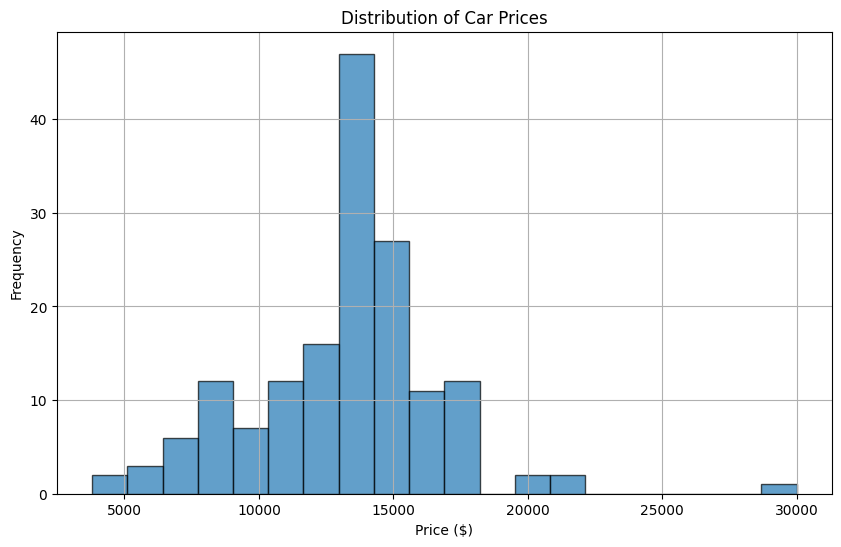

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=20, edgecolor="k", alpha=0.7)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

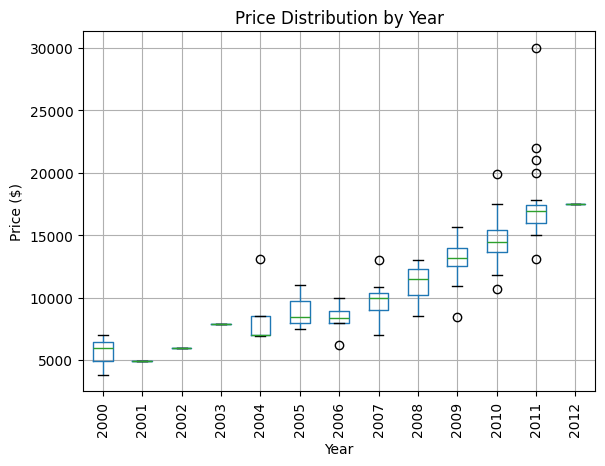

In [10]:
plt.figure(figsize=(12, 6))
df.boxplot(column="price", by="year", rot=90)
plt.title("Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.suptitle("")  # 移除默认标题
plt.grid(True)
plt.show()

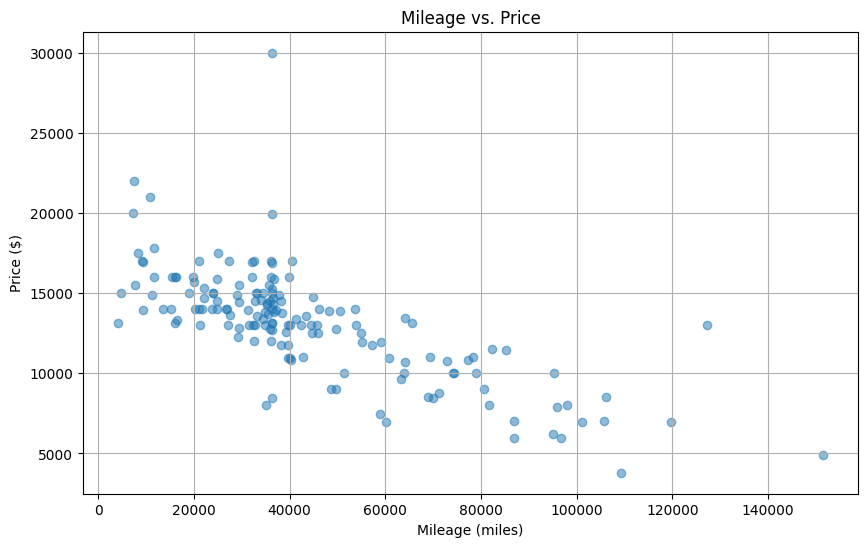

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df["mileage"], df["price"], alpha=0.5)
plt.title("Mileage vs. Price")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

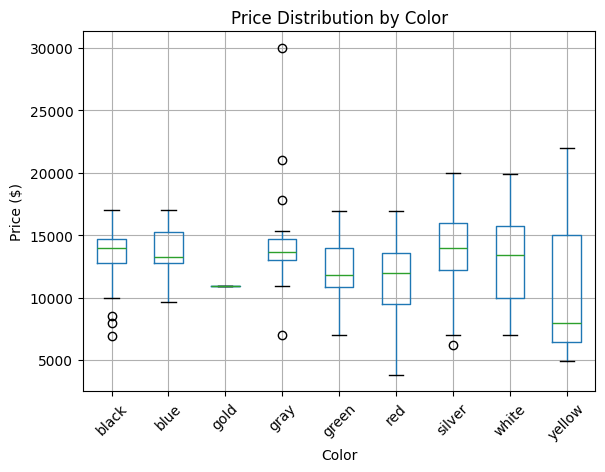

In [12]:
plt.figure(figsize=(12, 6))
df.boxplot(column="price", by="color", rot=45)
plt.title("Price Distribution by Color")
plt.xlabel("Color")
plt.ylabel("Price ($)")
plt.suptitle("")  # 移除默认标题
plt.grid(True)
plt.show()

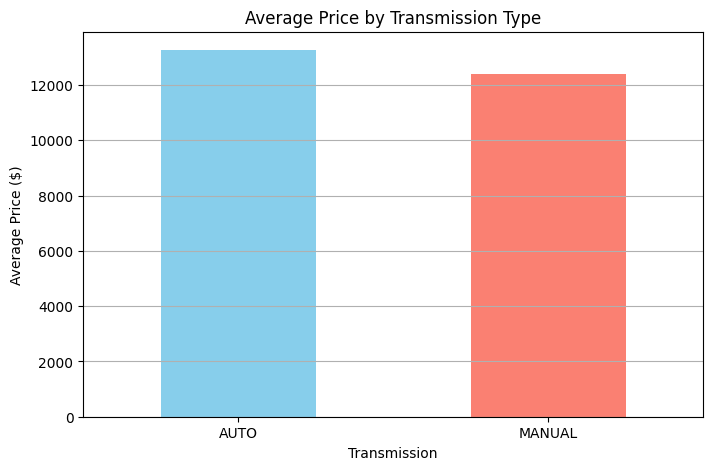

In [13]:
transmission_price = df.groupby("transmission")["price"].mean()
plt.figure(figsize=(8, 5))
transmission_price.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Average Price by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

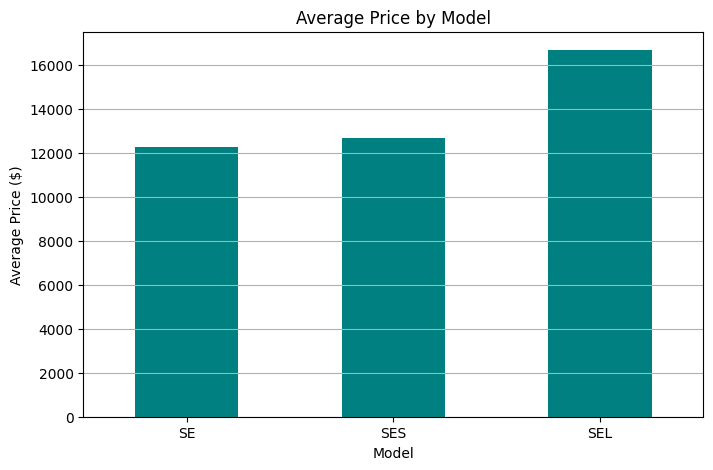

In [14]:
model_price = df.groupby("model")["price"].mean().sort_values()
plt.figure(figsize=(8, 5))
model_price.plot(kind="bar", color="teal")
plt.title("Average Price by Model")
plt.xlabel("Model")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

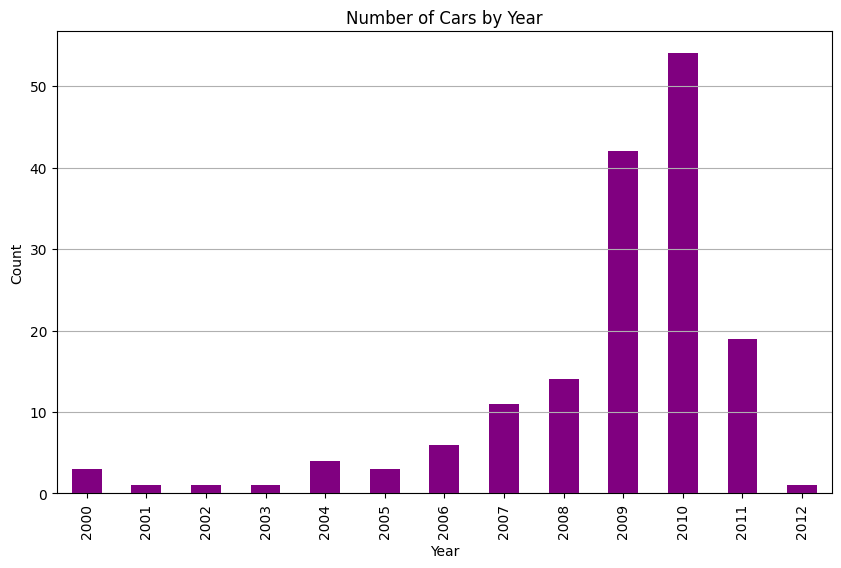

In [15]:
year_count = df["year"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
year_count.plot(kind="bar", color="purple")
plt.title("Number of Cars by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(axis="y")
plt.show()